In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
path = "/content/drive/MyDrive/Colab_Notebooks/Salary_Data.csv"
data = pd.read_csv(path)
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


## Original presentation

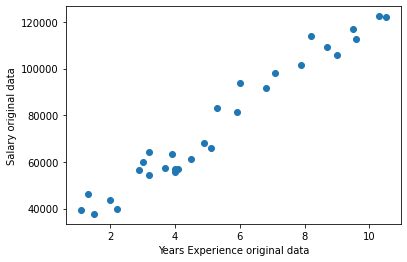

In [ ]:
X= data.iloc[:,0].values
X= X.reshape(-1,1)
Y= data.iloc[:,1].values
Y= Y.reshape(-1,1)
plt.scatter(X,Y)
plt.xlabel("Years Experience original data")
plt.ylabel("Salary original data")
plt.show()

## Regression with standardilization ( Scale x and y after train test split)

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(X,Y,test_size=0.3, random_state=20)

from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
scaler_y = StandardScaler()

train_x_scaled = scaler_x.fit_transform(train_x)
train_y_scaled = scaler_y.fit_transform(train_y)

In [ ]:
regression = LinearRegression()
regression.fit(train_x_scaled , train_y_scaled)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error
test_x_scaled= scaler_x.transform(test_x)
test_y_scaled= scaler_y.transform(test_y)
y_predicted = regression.predict(test_x_scaled)
print(len(y_predicted))
print(f"evaluation MSE: {mean_squared_error(test_y_scaled, y_predicted)}")

9
evaluation MSE: 0.047402939511210024


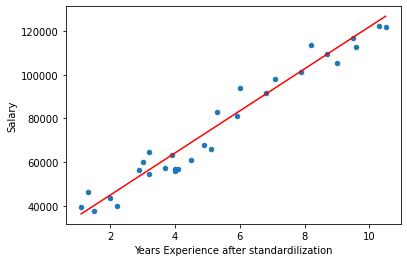

In [ ]:
y_predicted = regression.predict(scaler_x.transform(X))
# print(len(y_predicted))
# print(y_predicted)
y_predicted_inversed = scaler_y.inverse_transform(y_predicted)
# print(y_predicted_inversed)

plt.scatter(X,Y,s=20, label="train")
plt.plot(X, y_predicted_inversed , color="red")
plt.xlabel("Years Experience after standardilization")
plt.ylabel("Salary")
plt.show()

## Regression without standardilization

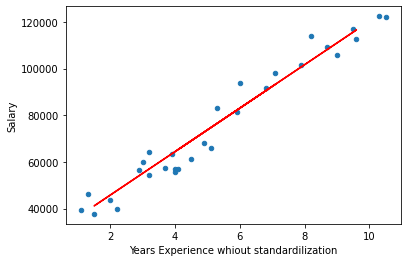

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(X,Y,test_size=0.3, random_state=10)
regression = LinearRegression()
regression.fit(train_x,train_y)
y_hat = regression.predict(test_x)

plt.scatter(X[:,0], Y,s=20)
plt.plot(test_x, y_hat, color="red")
plt.xlabel("Years Experience whiout standardilization")
plt.ylabel("Salary")
plt.show()

## Regression with standardilization (Scale all X first)

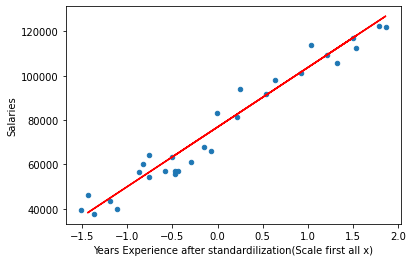

In [ ]:
scaler = StandardScaler()
scaler= scaler.fit(X)
# print(scaler.mean_)
x_scaled= scaler.transform(X)
# len(x_scaled)
# print(x_scaled.mean(axis=0))
# print(x_scaled.std(axis=0))

x_train, x_test, y_train, y_test = train_test_split(x_scaled, Y, test_size= 0.3, random_state=20)

regression= LinearRegression()
regression.fit(x_train, y_train)
y_predicted = regression.predict(x_test)

plt.scatter(x_scaled, Y, s=20)
plt.plot(x_test, y_predicted, color="red")
plt.xlabel("Years Experience after standardilization(Scale first all x)")
plt.ylabel("Salaries")
plt.show()


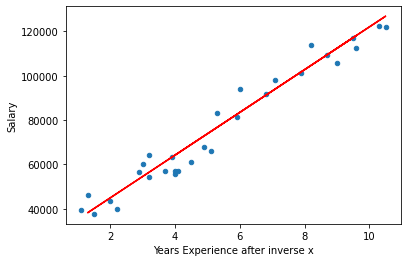

In [ ]:
x_scaled_in= scaler.inverse_transform(x_scaled)
# print("inverse x scaled", x_scaled_in)
x_test_in = scaler.inverse_transform(x_test)
# print("x test in",x_test_in  )
plt.scatter(x_scaled_in, Y, s=20)
plt.plot(x_test_in, y_predicted,color="red")
plt.xlabel("Years Experience after inverse x")
plt.ylabel("Salary")
plt.show()

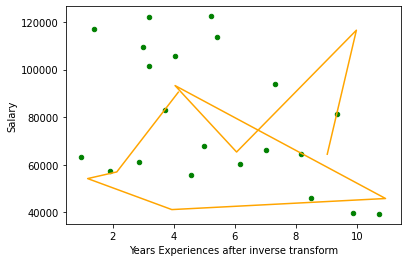

In [ ]:
X_train_inversed = scaler.inverse_transform(X_train_scaled)
X_test_inversed = scaler.inverse_transform(X_test_scaled)

plt.scatter(X_train_inversed[:,0], train_y, s=20, color="green")
plt.plot(X_test_inversed, y_hat, color="orange")
plt.xlabel("Years Experiences after inverse transform")
plt.ylabel("Salary")
plt.show()

In [ ]:
print("inverse x train: ", X_train_inversed)

inverse x train:  [[ 8.49666025]
 [ 7.32944038]
 [ 2.8727827 ]
 [ 9.34554743]
 [ 6.16222051]
 [ 4.57055705]
 [ 5.41944423]
 [ 2.9788936 ]
 [ 5.20722244]
 [ 3.19111539]
 [ 0.96278655]
 [ 1.38723014]
 [ 3.19111539]
 [ 8.17832756]
 [ 4.04000257]
 [ 7.01110769]
 [ 3.72166988]
 [10.72498909]
 [ 4.99500064]
 [ 9.87610191]
 [ 1.91778462]]


In [ ]:
print("inverse x test:", X_test_inversed)

inverse x test: [[ 4.14611346]
 [ 2.13000642]
 [ 1.17500834]
 [ 3.93389167]
 [10.93721088]
 [ 4.04000257]
 [ 6.05610961]
 [ 9.98221281]
 [ 9.02721473]]
